L26 - 15-110 CMU-Q, Fall'19, G. Di Caro

***
Today we will look at the aspects of **efficiency** of an algorithm. 

This will take us to introduce the important notion of **computational complexity** and the use of *Big O* notation

***

In [31]:
def simple_loop(dim=5000):
    x = [0] * dim
    y = [0] * dim

    for i in range(dim):
        y[i] = i * 1.0

    for i in range(dim):
        for j in range(dim):
            x[i] += y[j]
            
%time simple_loop(50000)

CPU times: user 4min 25s, sys: 1.53 s, total: 4min 26s
Wall time: 4min 31s


In [2]:
def factorial(n):
    res = 1
    for i in range(n):
        res *= i+1
    return res

%time factorial(10)

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 9.06 µs


3628800

In [40]:
def linear_search(L, item):
    for i in L:
        if i == item:
            return True
    return False

L = [1, 3, -2, 0, 100, 18, 45, 32, -9, 5]

line_search(L, 99)
line_search(L, 100)

True

In [44]:
def sumMtoN(m, n):
    sum = 0
    for i in range(m, n+1):
        sum += i 
    return sum

sumMtoN(10,20)

165

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
  

figure, subplots = plt.subplots(2,2, figsize=(8,8))

plt.subplots_adjust(left=None, bottom=None, right=None, 
                    top=None, wspace=0.5, hspace=0.35)

for i in (0,1):
    for j in (0,1):
        subplots[i,j].set_xlabel('$n$')
        subplots[i,j].set_ylabel('$f$')
        
x = np.arange(0, 100, 0.1) 

lin, = subplots[0,0].plot(x, x, label='$n$', color='brown') 
add, = subplots[0,0].plot(x, x+100, label='$n+10$') 

x = np.arange(0, 5000, 0.1) 

lin, = subplots[0,1].plot(x, x, label='$n$', color='brown') 
add, = subplots[0,1].plot(x, x+100, label='$n+100$') 

subplots[0,0].legend(handles=[lin, add])


x = np.arange(0, 50, 0.1) 

sqr, = subplots[1,0].plot(x, x*x, label='$n^2$', color='red') 
add, = subplots[1,0].plot(x, x*x + 100, label='$n^2+100$') 

x = np.arange(0, 1000, 0.1) 

sqr, = subplots[1,1].plot(x, x*x, label='$n^2$', color='red') 
add, = subplots[1,1].plot(x, x*x + 100, label='$n^2+100$') 

subplots[1,0].legend(handles=[sqr, add])

plt.savefig('additive.png')
plt.show() 

<Figure size 800x800 with 4 Axes>

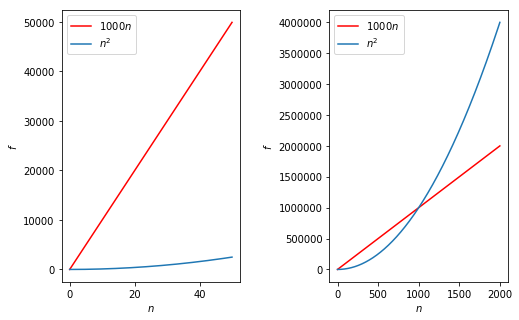

In [20]:
figure, subplots = plt.subplots(1,2, figsize=(8,5))

plt.subplots_adjust(left=None, bottom=None, right=None, 
                    top=None, wspace=0.5, hspace=0.35)

# Note: if only one row of subplots is in the figure, then only 
# one index has to be used
for j in (0,1):
    subplots[j].set_xlabel('$n$')
    subplots[j].set_ylabel('$f$')
        
plt.subplots_adjust(left=None, bottom=None, right=None, 
                    top=None, wspace=0.5, hspace=0.35)
        
x = np.arange(0, 50, 0.1) 

lin, = subplots[0].plot(x, 1000*x, label='$1000n$', color='red') 
sqr, = subplots[0].plot(x, x*x, label='$n^2$') 

subplots[0].legend(handles=[lin, sqr])


x = np.arange(0, 2000, 0.1) 

lin, = subplots[1].plot(x, 1000*x, label='$1000n$', color='red') 
sqr, = subplots[1].plot(x, x*x, label='$n^2$') 

subplots[1].legend(handles=[lin, sqr])

plt.savefig('multiplicative.png')
plt.show() 

In [98]:
def f(n):
    '''Input n is an int > 0'''
    add = 0
    
    #Loop that takes constant time
    for i in range(1000):
        add += 1
    print('Number of additions operations so far:', add)
    
    #Loop that takes time n
    for i in range(n):
        add += 1
    print('Number of additions operations so far:', add)
    
    #Loop that takes time n**2
    for i in range(n):
        for j in range(n):
            add += 1
            add += 1
    print('Number of additions operations so far:', add)

In [99]:
f(10)

Number of additions operations so far: 1000
Number of additions operations so far: 1010
Number of additions operations so far: 1210


In [100]:
f(1000)

Number of additions operations so far: 1000
Number of additions operations so far: 2000
Number of additions operations so far: 2002000


In [101]:
f(10000)

Number of additions operations so far: 1000
Number of additions operations so far: 11000
Number of additions operations so far: 200011000


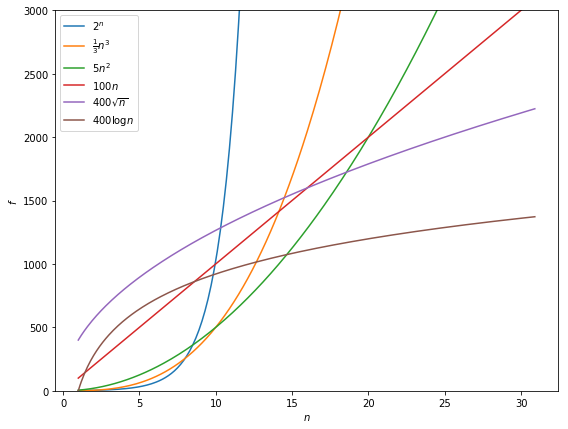

In [31]:
plt.figure(figsize=(9,7))
plt.xlabel('$n$')
plt.ylabel('$f$')
        
x = np.arange(1, 31, 0.1) 

labels = [0]*6
labels[0], = plt.plot(x, 2**x, label='$2^n$')
labels[1], = plt.plot(x, 0.5 * (x**3), label=r'$\frac{1}{3} n^3$')
labels[2], = plt.plot(x, 5*(x**2), label='$5n^2$')
labels[3], = plt.plot(x, 100*x, label='$100n$')
labels[4], = plt.plot(x, 400*np.sqrt(x), label='$400\sqrt{n}$')
labels[5], = plt.plot(x, 400*np.log(x), label='$400\log{n}$')


plt.ylim(0,3000)
plt.legend(handles=labels)
plt.savefig('growths.png')
plt.show()

In [52]:
def linear_func(x, a, b):
    return a*x + b

def poly2_func(x, a, b, c):
    return a*(x**2) + b*x + c

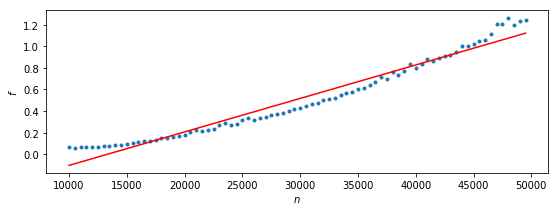

In [50]:
import time
import scipy.optimize as optimization

n= 50000
times = []
inputs = []
for i in range(10000, n, 500):
    start = time.process_time()
    factorial(i)
    end = time.process_time()
    times += [end-start]
    inputs += [i]
    
plt.figure(figsize=(9,3))
plt.xlabel('$n$')
plt.ylabel('$f$')
        
plt.scatter(inputs, times, marker='.')

# fit the data with a linear function
params, cov = optimization.curve_fit(linear_func, inputs, times)
linear_fit = []
for x in inputs:
    linear_fit += [linear_func(x, params[0], params[1])]
plt.plot(inputs, linear_fit, color='red')


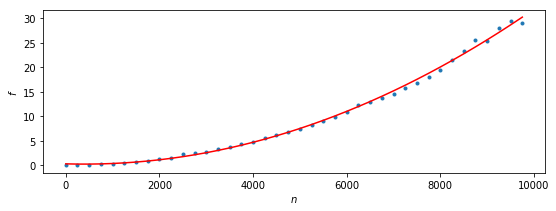

In [54]:
import time
n= 10000
times = []
inputs = []

for n in range(1, n, 250):
    x = 0
    start = time.process_time()
    for i in range(n):
        for j in range(n):
            x += i*j 
    end = time.process_time()
    times += [end-start]
    inputs += [n]
    
plt.figure(figsize=(9,3))
plt.scatter(inputs, times, marker='.')

plt.xlabel('$n$')
plt.ylabel('$f$')

# fit the data with a quadratic function
params, cov = optimization.curve_fit(poly2_func, inputs, times)
quadratic_fit = []
for x in inputs:
    quadratic_fit += [poly2_func(x, params[0], params[1], params[2])]
plt.plot(inputs, quadratic_fit, color='red')

In [ ]:
from itertools import permutations 
import time
n= 15  # time explodes factorially!
times = []
inputs = []

for n in range(0, n, 2):
    start = time.process_time()
    l = list(permutations(range(1, n))) 
    end = time.process_time()
    times += [end-start]
    inputs += [n]
    
plt.figure(figsize=(9,3))
plt.scatter(inputs, times, marker='.')
